In [1]:
import pandas as pd
import numpy as np
from causallearn.search.ConstraintBased.FCI import fci
from causallearn.utils.cit import rcit
import networkx as nx
import matplotlib.pyplot as plt
from causallearn.utils.GraphUtils import GraphUtils

In [ ]:
df = pd.read_csv("encoded_clean_data3.csv")

df = df.iloc[:, 1:-17]
df = df.apply(pd.to_numeric, errors="coerce")
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.apply(lambda col: col.fillna(col.mean()), axis=0)
df = df.dropna(axis=1, how="all")
df = df.dropna(axis=0, how="any")

In [5]:
df1 = df.sample(frac=0.1, random_state=42)

features = [
    "physical_status", "Length", "LACE", "Comorbidity", "age", "BUN",
    "NIBP_MAP", "E_origin", "WBC", "HR", "admission_location", "insurance",
    "NIBP_DIA", "Acuity", "Hgb", "NIBP_SYS", "Glucose", "SpO2", "readmitted"
]

df1 = df1[features]

data1 = df1.to_numpy()
var_names1 = df1.columns.tolist()

In [ ]:
pag, sep_set = fci(data1, independence_test_method=rcit, alpha=0.01, max_k=3, verbose=False)

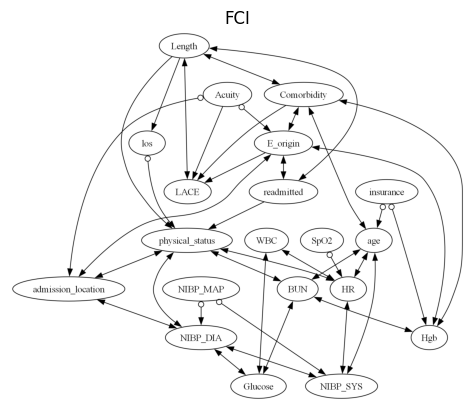

In [ ]:
pydot_graph = GraphUtils.to_pydot(pag, labels=var_names1)
pydot_graph.write_png("figures/fci_result.png") 

img = plt.imread("figures/fci_result.png")
plt.imshow(img)
plt.axis('off')
plt.title("FCI")
plt.show()

In [11]:
df2 = df.sample(frac=0.1, random_state=42)

features2 = [
    "physical_status", "Length", "LACE", "Comorbidity", "age", "BUN",
    "NIBP_MAP", "E_origin", "WBC", "readmitted"
]

df2 = df2[features2]

data2 = df2.to_numpy()
var_names2 = df2.columns.tolist()

In [12]:
pag2, sep_set2 = fci(data2, independence_test_method=rcit, alpha=0.01, max_k=3, verbose=False)

  0%|          | 0/10 [00:00<?, ?it/s]

X2 --> X1
X1 --> X4
X1 --> X6
X4 --> X3
X8 --> X3
X3 --> X10
X4 --> X8


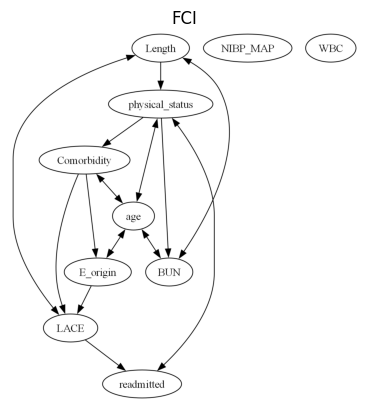

In [13]:
pydot_graph = GraphUtils.to_pydot(pag2, labels=var_names2)
pydot_graph.write_png("figures/fci_result2.png") 

img = plt.imread("figures/fci_result2.png")
plt.imshow(img)
plt.axis('off')
plt.title("FCI")
plt.show()

In [14]:
df3 = df.sample(frac=0.1, random_state=42)

features3 = [
    "physical_status", "Length", "LACE", "Comorbidity", "age", "readmitted"
]

df3 = df3[features3]

data3 = df3.to_numpy()
var_names3 = df3.columns.tolist()

In [15]:
pag3, sep_set3 = fci(data3, independence_test_method=rcit, alpha=0.05, max_k=3, verbose=False)

  0%|          | 0/6 [00:00<?, ?it/s]

X4 --> X3
X3 --> X6
X5 --> X6


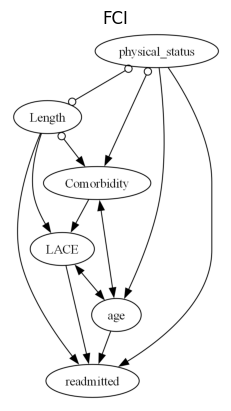

In [17]:
pydot_graph = GraphUtils.to_pydot(pag3, labels=var_names3)
pydot_graph.write_png("figures/fci_result3.png") 

img = plt.imread("figures/fci_result3.png")
plt.imshow(img)
plt.axis('off')
plt.title("FCI")
plt.show()